In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 8})


In [2]:
# Load the class output files in outs.zip (must unzip before)
runs = []
n_vars = 11
for i in range(6*n_vars):
    if i<10:
        runs.append("0" + str(i))
    else:
        runs.append(str(i))

data_bg = {}
data_cl = {}
data_pk = {}
for i in range(len(runs)):
    data_bg[int(runs[i])] = np.loadtxt("outs/default" + runs[i] + "_background.dat").T
    data_cl[int(runs[i])] = np.loadtxt("outs/default" + runs[i] + "_cl.dat").T
    data_pk[int(runs[i])] = np.loadtxt("outs/default" + runs[i] + "_pk.dat").T


In [8]:
# Parameters names and Planck colaboration values
params_str = [r"$\Omega_b h^2$", r"$\Omega_{\textrm{CDM}} h^2$", r"$h$", r"$\tau$", r"$\textrm{ln}\left(10^{10}A_s\right)$", r"$n_s$"]
params = [0.02236,  0.1202, 0.6727, 0.0544, 3.045, 0.9649]

# Multipliers on runs
mults = np.array([0.5 + i*(1/(n_vars-1))for i in range(n_vars)])

# CMB power spectrum

[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5]


Text(0.5, 0, '$l$')

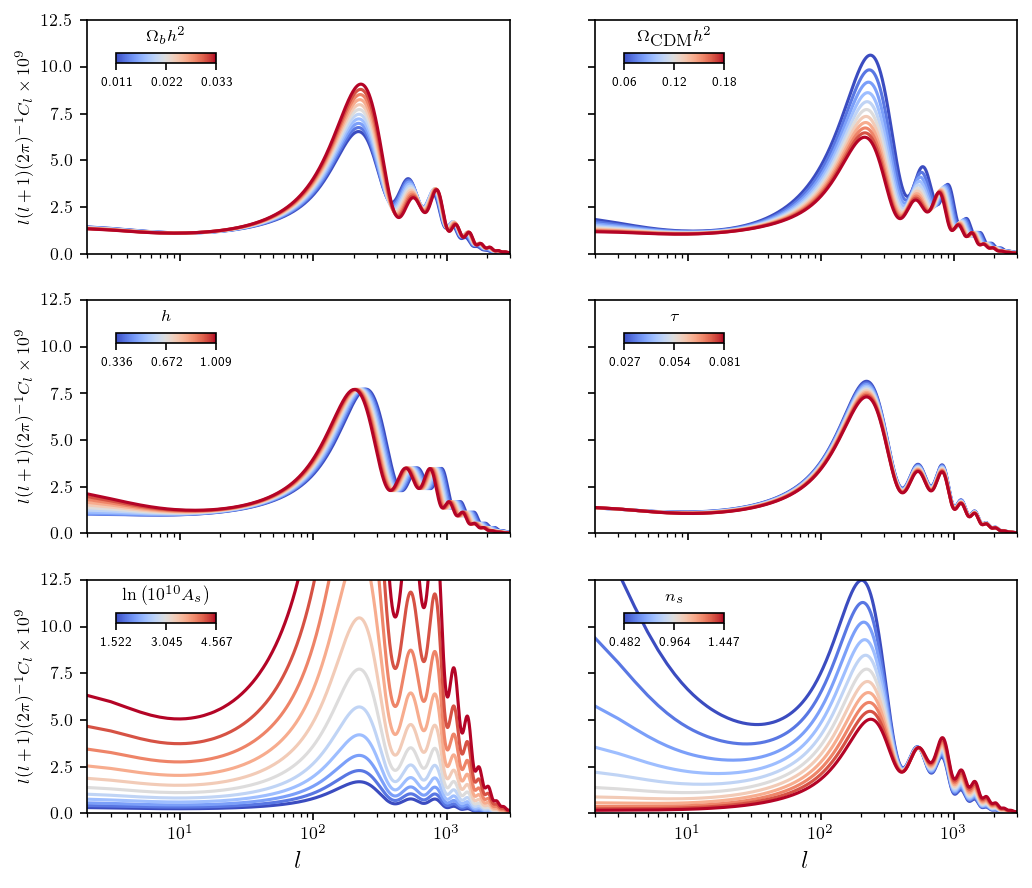

In [6]:
fig, ax = plt.subplots(3, 2, figsize=(8,7), dpi=150, sharex = True, sharey = True)
cNorm = colors.Normalize(vmin=0.5, vmax=1.5)
cm = plt.get_cmap('coolwarm')
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

cb = np.zeros_like(ax)
cbax = np.zeros_like(ax)

for no_param in range(len(params)):
    col = no_param % 2 
    row = int(no_param/2)
    for i in range(n_vars*no_param,n_vars*(no_param+1)):
        ax[row][col].plot(data_cl[i][0],10e9*data_cl[i][1],color = scalarMap.to_rgba(mults[i-n_vars*no_param]))

    cbax[row][col] = inset_axes(ax[row][col], width="20%", height="5%", loc=2,bbox_to_anchor=(170+508*col,700-280*row,500,200)) 
    cb[row][col] = matplotlib.colorbar.ColorbarBase(cbax[row][col],cmap=cm, norm=cNorm, orientation='horizontal',ticks=[0.5, 1.0, 1.5])
    cbax[row][col].set_title(params_str[no_param], fontsize = 8)
    cb[row][col].ax.set_xticklabels((np.array([0.5, 1.0, 1.5])*params[no_param]*1000).astype(int)/1000,fontsize = 6)

ax[0,0].set_xscale("log")
ax[0,0].set_ylim(0,12.5)
ax[0,0].set_xlim(2e0,3*10e2)

ax[0,0].set_ylabel(r"$l(l+1)(2\pi)^{-1}C_l\times 10^9$", fontsize  = 8)
ax[1,0].set_ylabel(r"$l(l+1)(2\pi)^{-1}C_l\times 10^9$", fontsize  = 8)
ax[2,0].set_ylabel(r"$l(l+1)(2\pi)^{-1}C_l\times 10^9$", fontsize  = 8)
ax[2,0].set_xlabel(r"$l$", fontsize  = 12)
ax[2,1].set_xlabel(r"$l$", fontsize  = 12)


# Matter power spectrum

Text(0.5, 0, 'Wavenumber $k$ $\\left[h \\rm{Mpc}^{-1}\\right]$')

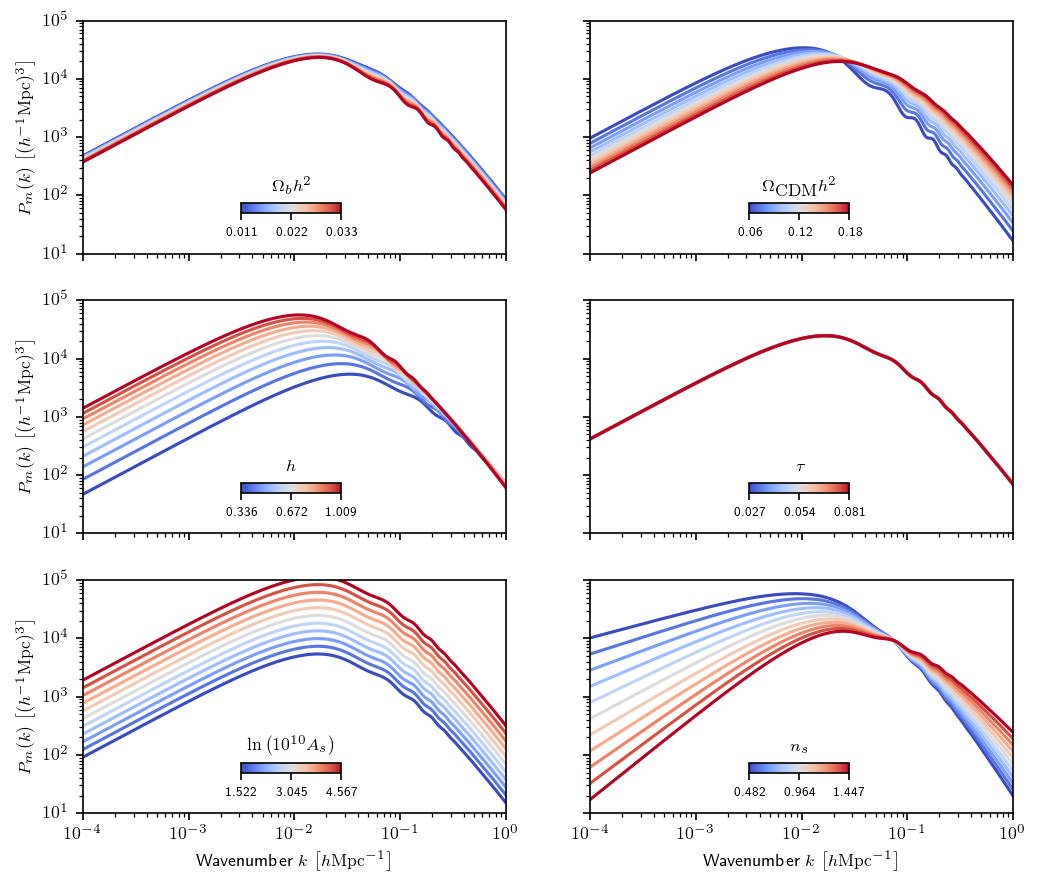

In [9]:
fig, ax = plt.subplots(3, 2, figsize=(8,7), dpi=150, sharex = True, sharey = True)
cNorm = colors.Normalize(vmin=0.5, vmax=1.5)
cm = plt.get_cmap('coolwarm')
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

cb = np.zeros_like(ax)
cbax = np.zeros_like(ax)

for no_param in range(len(params)):
    col = no_param % 2 
    row = int(no_param/2)
    for i in range(n_vars*no_param,n_vars*(no_param+1)):
        ax[row][col].plot(data_pk[i][0],data_pk[i][1],color = scalarMap.to_rgba(mults[i-n_vars*no_param]))

    cbax[row][col] = inset_axes(ax[row][col], width="20%", height="5%", loc=2,bbox_to_anchor=(300+508*col,550-280*row,500,200)) 
    cb[row][col] = matplotlib.colorbar.ColorbarBase(cbax[row][col],cmap=cm, norm=cNorm, orientation='horizontal',ticks=[0.5, 1.0, 1.5])
    cbax[row][col].set_title(params_str[no_param], fontsize = 8)
    cb[row][col].ax.set_xticklabels((np.array([0.5, 1.0, 1.5])*params[no_param]*1000).astype(int)/1000,fontsize = 6)

ax[0,0].set_xscale("log")
ax[0,0].set_yscale("log")
ax[0,0].set_ylim(10e0,10e4)
ax[0,0].set_xlim(10e-5,10e-1)

ax[0,0].set_ylabel(r"$P_m(k)$ $\left[(h^{-1} \rm{Mpc})^{3}\right]$")
ax[1,0].set_ylabel(r"$P_m(k)$ $\left[(h^{-1} \rm{Mpc})^{3}\right]$")
ax[2,0].set_ylabel(r"$P_m(k)$ $\left[(h^{-1} \rm{Mpc})^{3}\right]$")
ax[2,0].set_xlabel(r"Wavenumber $k$ $\left[h \rm{Mpc}^{-1}\right]$")
ax[2,1].set_xlabel(r"Wavenumber $k$ $\left[h \rm{Mpc}^{-1}\right]$")


# Distance modulus

C:\Users\tu_rk\AppData\Local\Temp\ipykernel_12208\2252892370.py:19: RuntimeWarning: divide by zero encountered in log10
  ax[row][col].plot(data_bg[i][0], 5*np.log10(data_bg[i][6])+25,color = scalarMap.to_rgba(mults[i-n_vars*no_param]))
C:\Users\tu_rk\AppData\Local\Temp\ipykernel_12208\2252892370.py:19: RuntimeWarning: divide by zero encountered in log10
  ax[row][col].plot(data_bg[i][0], 5*np.log10(data_bg[i][6])+25,color = scalarMap.to_rgba(mults[i-n_vars*no_param]))
C:\Users\tu_rk\AppData\Local\Temp\ipykernel_12208\2252892370.py:19: RuntimeWarning: divide by zero encountered in log10
  ax[row][col].plot(data_bg[i][0], 5*np.log10(data_bg[i][6])+25,color = scalarMap.to_rgba(mults[i-n_vars*no_param]))
C:\Users\tu_rk\AppData\Local\Temp\ipykernel_12208\2252892370.py:19: RuntimeWarning: divide by zero encountered in log10
  ax[row][col].plot(data_bg[i][0], 5*np.log10(data_bg[i][6])+25,color = scalarMap.to_rgba(mults[i-n_vars*no_param]))
C:\Users\tu_rk\AppData\Local\Temp\ipykernel_12208\22

Text(0.5, 0, '$z$')

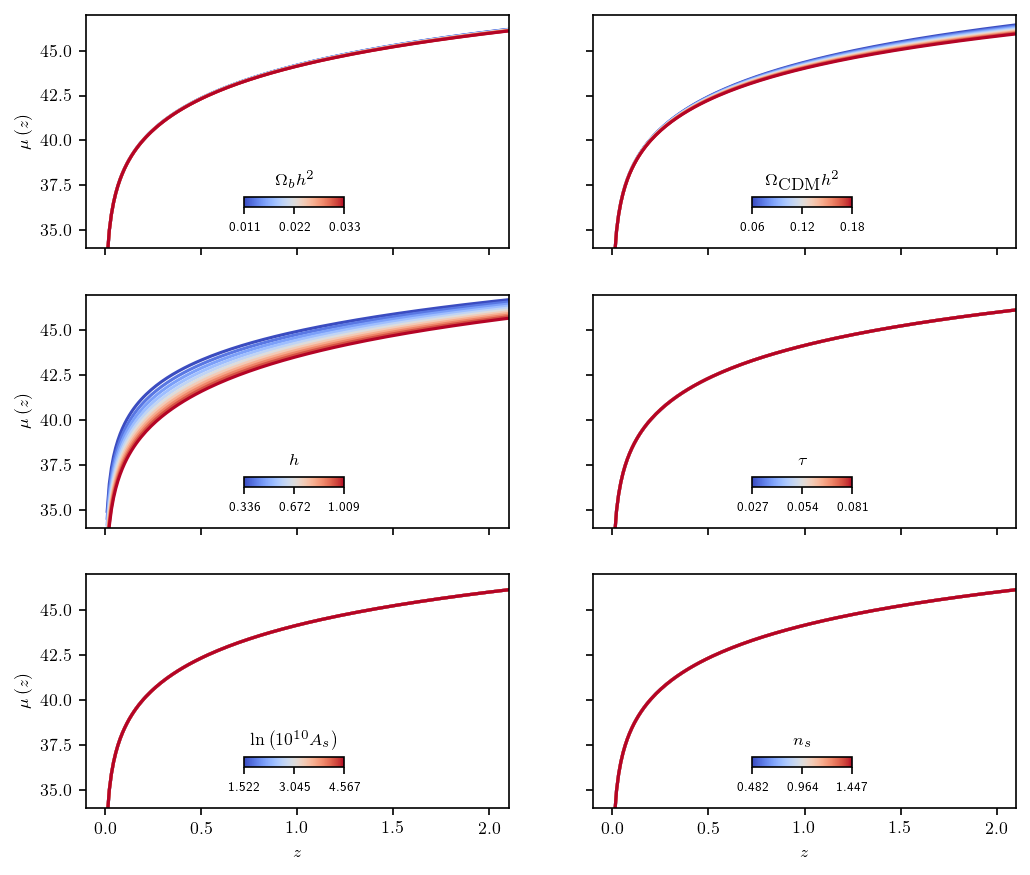

In [10]:
import pandas as pd
df_mu = pd.read_csv("mu.csv")
z_exp = np.array(df_mu["z"])
mu_exp = np.array(df_mu["mu"])
error_exp = np.array(df_mu["error"])

fig, ax = plt.subplots(3, 2, figsize=(8,7), dpi=150, sharex = True, sharey = True)
cNorm = colors.Normalize(vmin=0.5, vmax=1.5)
cm = plt.get_cmap('coolwarm')
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

cb = np.zeros_like(ax)
cbax = np.zeros_like(ax)

for no_param in range(len(params)):
    col = no_param % 2 
    row = int(no_param/2)
    for i in range(n_vars*no_param,n_vars*(no_param+1)):
        ax[row][col].plot(data_bg[i][0], 5*np.log10(data_bg[i][6])+25,color = scalarMap.to_rgba(mults[i-n_vars*no_param]))

    cbax[row][col] = inset_axes(ax[row][col], width="20%", height="5%", loc=2,bbox_to_anchor=(300+508*col,550-280*row,500,200)) 
    cb[row][col] = matplotlib.colorbar.ColorbarBase(cbax[row][col],cmap=cm, norm=cNorm, orientation='horizontal',ticks=[0.5, 1.0, 1.5])
    cbax[row][col].set_title(params_str[no_param], fontsize = 8)
    cb[row][col].ax.set_xticklabels((np.array([0.5, 1.0, 1.5])*params[no_param]*1000).astype(int)/1000,fontsize = 6)

ax[0,0].set_ylim(34,47)
ax[0,0].set_xlim(-0.1,2.1)

ax[0,0].set_ylabel(r"$\mu\left(z\right)$")
ax[1,0].set_ylabel(r"$\mu\left(z\right)$")
ax[2,0].set_ylabel(r"$\mu\left(z\right)$")
ax[2,0].set_xlabel(r"$z$")
ax[2,1].set_xlabel(r"$z$")



C:\Users\tu_rk\AppData\Local\Temp\ipykernel_12208\3727949364.py:5: RuntimeWarning: divide by zero encountered in log10
  ax.plot(data_bg[i][0], 5*np.log10(data_bg[i][6])+25, color = scalarMap.to_rgba(mults[i-n_vars*no_param]));
C:\Users\tu_rk\AppData\Local\Temp\ipykernel_12208\3727949364.py:5: RuntimeWarning: divide by zero encountered in log10
  ax.plot(data_bg[i][0], 5*np.log10(data_bg[i][6])+25, color = scalarMap.to_rgba(mults[i-n_vars*no_param]));
C:\Users\tu_rk\AppData\Local\Temp\ipykernel_12208\3727949364.py:5: RuntimeWarning: divide by zero encountered in log10
  ax.plot(data_bg[i][0], 5*np.log10(data_bg[i][6])+25, color = scalarMap.to_rgba(mults[i-n_vars*no_param]));
C:\Users\tu_rk\AppData\Local\Temp\ipykernel_12208\3727949364.py:5: RuntimeWarning: divide by zero encountered in log10
  ax.plot(data_bg[i][0], 5*np.log10(data_bg[i][6])+25, color = scalarMap.to_rgba(mults[i-n_vars*no_param]));
C:\Users\tu_rk\AppData\Local\Temp\ipykernel_12208\3727949364.py:5: RuntimeWarning: divid

Text(0, 0.5, '$\\mu\\left(z\\right)$')

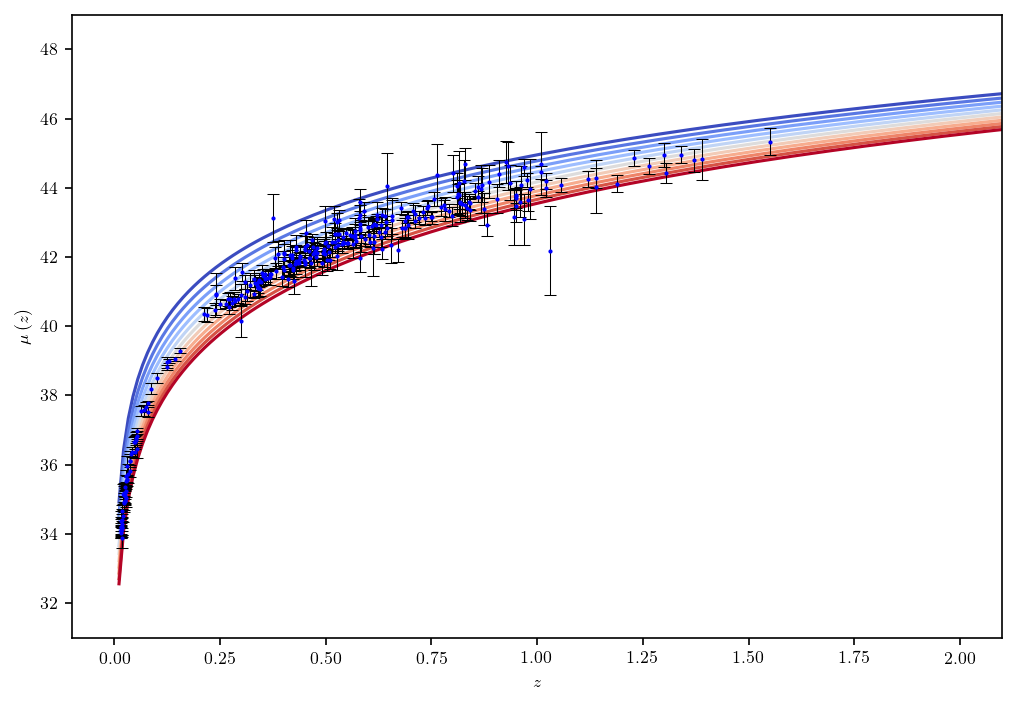

In [11]:

fig,ax = plt.subplots(figsize=(8,5.5),dpi=150)

no_param = 2
for i in range(n_vars*no_param,n_vars*(no_param+1)):
    ax.plot(data_bg[i][0], 5*np.log10(data_bg[i][6])+25, color = scalarMap.to_rgba(mults[i-n_vars*no_param]));
ax.errorbar(z_exp,mu_exp,yerr=error_exp,fmt='.',elinewidth=0.5,capthick=0.5,capsize=3,ecolor="k",color="b",ms=2,label=r"Experimental")

ax.set_ylim(31,49)
ax.set_xlim(-0.1,2.1)

#plt.xscale("log")
#plt.yscale("log")

#ax.grid()
ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$\mu\left(z\right)$")
#ax.set_title(r"Density parameters as functions of $z$")
#plt.savefig("12.mulcdm.png")